w=0.9931. b=0.0561, batch_loss=0.0007533785925867657


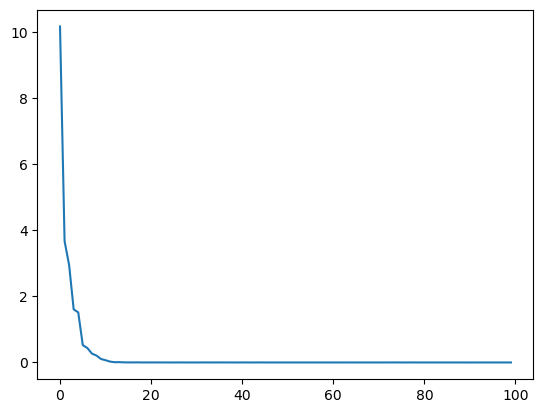

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

x = np.arange(12)
t = np.arange(12)

w = tf.Variable(0.5)
b = tf.Variable(0.0)
lr= 0.001   # learning rate, 0.0001

train_size = x.size # 12
batch_size = 4
K = train_size// batch_size

loss_list = [ ]
for epoch in range(100):
    batch_loss = 0.0
    for step in range(K):
        mask = np.random.choice(train_size, batch_size)
        x_batch = x[mask]
        t_batch = t[mask]
        
        with tf.GradientTape() as tape:
            y = w*x_batch + b
            loss = tf.reduce_mean(tf.square(y - t_batch))

        dW, dB = tape.gradient(loss, [w, b])
        w.assign_sub(lr * dW)
        b.assign_sub(lr * dB)

        batch_loss += loss.numpy() # pre-update loss
    batch_loss /= K #  average loss
    loss_list.append(batch_loss) 

##    if not epoch%10:
##        print("epoch={}: w={:>.4f}. b={:>.4f}, batch_loss={}".format(
##               epoch, w.numpy(), b.numpy(), batch_loss))

print("w={:>.4f}. b={:>.4f}, batch_loss={}".format(w.numpy(), b.numpy(), batch_loss))

plt.plot(loss_list)
plt.show()
